In [1]:
import pandas as pd
import requests
from lxml import html
import matplotlib.pyplot as plt

In [2]:
class mh:
    def __init__(self, url, cookies):
        self.url = url
        self.game_code = url.split("match-details")[1]
        self.api_url = F"https://acs.leagueoflegends.com/v1/stats/game{self.game_code}"
        self.cookies = cookies

    def api_call(self):
        self.json = requests.get(self.api_url, cookies=self.cookies).json()
        return self.json
        
    def data_list(self):
        self.api_call()
        match_list = []
        version = self.json["gameVersion"]
        begin = self.json["gameCreation"]
        duration = self.json["gameDuration"]/60
        for i in range(10):
            iddelcampeon = self.json["participants"][i]["championId"];
            name_player = self.json["participantIdentities"][i]["player"]["summonerName"];
            team = name_player.split(" ")[0]
            role = i if i < 5 else i -5
            stats = self.json["participants"][i]["stats"]
            win = int(stats["win"])
            oro = stats["goldEarned"]
            death = stats["deaths"]
            assists = stats["assists"]
            kills  = stats["kills"]
            kda = kills+assists if (death == 0) else  (kills+assists) /death
            damage = stats["totalDamageDealtToChampions"];
            farmeo = stats["totalMinionsKilled"]+stats["neutralMinionsKilled"]
            visionscore = stats["visionScore"]
            match_list.append([version, begin, duration, iddelcampeon, team,name_player, role, win, 
                               oro, farmeo, kills, death, assists, kda, damage, visionscore,  
                               oro/duration, farmeo/duration, kills/duration, death/duration, 
                               assists/duration, kda/duration, damage/duration, visionscore/duration])
        return(match_list)
    
    def df(self):
        dataframe = pd.DataFrame(columns=['Version','Start','GameTime','Id Champ', 'Team', 'Player',"Role",
                                          'Victory','Gold','Farm','Kills', 'Deaths', 'Assist', 'KDA', 'Damage','Visionscore',
                                          'Gold/min','Farm/min','Kills/min', 'Deaths/min', 'Assist/min', 'KDA/min', 'Damage/min',
                                          'Vision/min'])
        match_list = self.data_list()
        for i in range(len(match_list)):
            dataframe.loc[len(dataframe)] = match_list[i]
        return dataframe

In [3]:
#Take the match history urls from gamepedia 
url = "https://lol.gamepedia.com/LEC/2021_Season/Spring_Season/Match_History"
page = requests.get(url)
webpage = html.fromstring(page.content)

webpage_hyperlinks = webpage.xpath('//a/@href')
matchhistory_links = list(filter(lambda x: "matchhistory" in x, webpage_hyperlinks))

In [4]:
#To take the data from the match history you have to use your login riot cookie
cookies = dict(cookies_are='PVPNET_LANG=; ping_session_id=; PVPNET_LANG=; PVPNET_TOKEN_EUW=; PVPNET_REGION=; id_token=; oidc_state=; csrf=')
for i in matchhistory_links:
    partido = mh(i,cookies)
    df = partido.df() if i == matchhistory_links[0] else df.append(partido.df(),ignore_index=True)

In [5]:
df.head(2)

,Version,Start,GameTime,Id Champ,Team,Player,Role,Victory,Gold,Farm,...,Damage,Visionscore,Gold/min,Farm/min,Kills/min,Deaths/min,Assist/min,KDA/min,Damage/min,Vision/min
0,11.2.353.8505,1612033519047,35.833333,62,MAD,MAD Armut,0,1,16457,215,...,17356,45,459.265116,6.000000,0.306977,0.167442,0.139535,0.074419,484.353488,1.255814
1,11.2.353.8505,1612033519047,35.833333,163,MAD,MAD Elyoya,1,1,14121,225,...,16372,37,394.074419,6.279070,0.111628,0.083721,0.474419,0.195349,456.893023,1.032558
2,11.2.353.8505,1612033519047,35.833333,268,MAD,MAD Humanoid,2,1,16771,312,...,30808,36,468.027907,8.706977,0.251163,0.111628,0.418605,0.167442,859.758140,1.004651
3,11.2.353.8505,1612033519047,35.833333,498,MAD,MAD Carzzy,3,1,14203,259,...,15827,59,396.362791,7.227907,0.083721,0.139535,0.390698,0.094884,441.683721,1.646512
4,11.2.353.8505,1612033519047,35.833333,526,MAD,MAD Kaiser,4,1,9886,36,...,7867,110,275.888372,1.004651,0.055814,0.083721,0.558140,0.204651,219.544186,3.069767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,11.1.352.5559,1611333025742,32.100000,58,MAD,MAD Armut,0,0,10843,223,...,14697,36,337.788162,6.947040,0.093458,0.186916,0.093458,0.031153,457.850467,1.121495
246,11.1.352.5559,1611333025742,32.100000,876,MAD,MAD Elyoya,1,0,10965,196,...,13039,45,341.588785,6.105919,0.062305,0.124611,0.186916,0.062305,406.199377,1.401869
247,11.1.352.5559,1611333025742,32.100000,18,MAD,MAD Humanoid,2,0,13096,271,...,15191,43,407.975078,8.442368,0.062305,0.186916,0.155763,0.036345,473.239875,1.339564
248,11.1.352.5559,1611333025742,32.100000,202,MAD,MAD Carzzy,3,0,10825,267,...,14922,30,337.227414,8.317757,0.031153,0.124611,0.124611,0.038941,464.859813,0.934579


In [6]:
#Calculate the distance to mean measure in %
team_stats = df.groupby(["Team"]).mean()[["Farm/min", "Gold/min", "Kills/min", "KDA/min","Damage/min","Vision/min"]]
team_percentage = 100*(team_stats-team_stats.mean())/team_stats.mean()

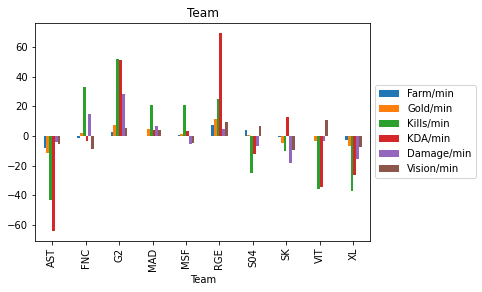

In [7]:
team_percentage.plot.bar()
plt.title("Team")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [8]:
#Calculate the distance to mean measure in %
role_stats = df.groupby(["Role"]).mean()[["Farm/min", "Gold/min", "Kills/min", "KDA/min","Damage/min","Vision/min"]]
role_player_stats = df.groupby(["Role","Player"]).mean()[["Farm/min", "Gold/min", "Kills/min", "KDA/min","Damage/min","Vision/min"]]
role_player_percentage = 100*(role_player_stats -role_stats)/role_stats

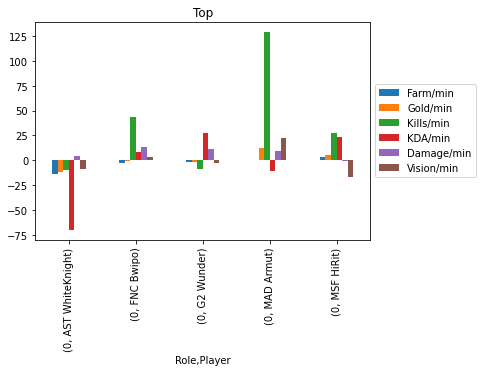

In [10]:
#Plot the results for the toplaner
role_player_percentage.iloc[0:5].plot.bar()
plt.title("Top")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))